In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# makes inline plots to have better quality
#%config InlineBackend.figure_format = 'svg'

# Set the default style
plt.style.use("seaborn") 

1. Averaging over all images (people images) what percentage of right answers do they have?


2. In general people answer more Real or tend to answer more AI ?


3. Are they good at spotting AI images? are they good at spotting Real images?


4. How does it compare with one image versus when they have two images? How easier is it? 


5. How many people answer I do not know?


6. More confident people get better results (that answer definitely yes or definitely no)?


7. Are people too confident or not enough?


8. Do people improve over the task? Do they get a better percentage on the last image than on the first ?

### Load the data

In [3]:
df = pd.read_pickle("data_28.05.20/data_translated_mapped_joined.pickle")

In [4]:
df

,ts,score,age,gender,education,studied_ai,passed_sim_tests,p1,woc1,p2,...,p1_map,p2_map,p3_map,p4_map,p5_map,p6_map,p7_map,p8_map,art1_map,art2_map
0,4/17/2020 12:39:56,5,43,F,BSc,no,no,Probably no,0.8,Probably no,...,0,1,0,1,1,0,1,0,0,1
1,4/17/2020 13:49:56,6,31,M,MSc,no,no,Probably yes,0.9,I don't know,...,1,0,1,1,1,0,0,0,1,1
3,4/20/2020 0:08:15,6,51,M,MSc,no,no,Probably no,0.3,Probably yes,...,0,0,0,0,1,1,1,1,1,1
4,4/20/2020 16:21:08,6,48,M,BSc,no,no,Probably yes,0.7,Probably yes,...,1,0,1,1,0,1,1,0,0,1
5,4/20/2020 17:25:29,5,55,F,MSc,no,no,Probably yes,0.6,Probably yes,...,1,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5/17/2020 22:52:44,3,34,F,MSc,no,no,I don't know,0.7,Probably no,...,0,1,0,0,0,0,1,1,0,0
108,5/19/2020 0:02:00,6,23,F,BSc,no,no,Probably no,0.5,Definitely no,...,0,1,1,1,0,0,0,1,1,1
109,5/26/2020 0:38:29,3,31,M,BSc,no,no,Definitely no,0.1,Probably yes,...,0,0,1,0,0,0,0,1,0,1
110,5/26/2020 12:50:09,6,35,M,BSc,no,no,Probably no,0.6,Probably no,...,0,1,0,1,1,1,1,0,1,0


In [5]:
people_simple_cols = ['p1', 'p2', 'p3', 'p4']
people_comp_cols = ['p4', 'p5', 'p6', 'p7', 'p8']
people_cols = people_simple_cols + people_comp_cols

people_simple_cols_mapped = ['p1_map', 'p2_map', 'p3_map', 'p4_map']
people_comp_cols_mapped = ['p5_map', 'p6_map', 'p7_map', 'p8_map']
people_cols_mapped = people_simple_cols_mapped + people_comp_cols_mapped

art_cols = ['art1', 'art2']
art_cols_mapped = ['art1_map', 'art2_map']

question_cols = people_cols + art_cols
question_cols_mapped = people_cols_mapped + art_cols_mapped

In [6]:
df.columns

Index(['ts', 'score', 'age', 'gender', 'education', 'studied_ai',
       'passed_sim_tests', 'p1', 'woc1', 'p2', 'woc2', 'p3', 'woc3', 'p4',
       'woc4', 'p5', 'woc5', 'p6', 'woc6', 'p7', 'woc7', 'p8', 'woc8', 'art1',
       'woc_art1', 'art2', 'woc_art2', 'questionnaire_id', 'p1_map', 'p2_map',
       'p3_map', 'p4_map', 'p5_map', 'p6_map', 'p7_map', 'p8_map', 'art1_map',
       'art2_map'],
      dtype='object')

#### Data description
1. **ts** - timestamp, datetime


2. **score** - respondent's score (min 0, max 10), int


3. **age** - respondent's age, int


4. **gender** - respondent's gender, str


5. **education** - respondent's education, str


6. **studied_ai** - whether the respondent studied or worked with AI before or not, str


7. **passed_sim_tests** - whether the respondent before or not (here we consider only "no" case), str


8. **p1, p2, p3, p4** - simple questions, images of people, str


9. **p5, p6, p7, p8** - comparison questions, images of people, str


10. **art1, art2** - simple questions, modern art images, str


11. **woc1 - woc8, woc_art1, woc_art2** - wisdom-of-the-crowd questions, float


12. **questionnaire_id** - number of questionnare what the record belongs to (1,2,3,4), int


13. **p1_map - p8_map, art1_map, art2_map** - answers mapped to 0/1, int


### Data Analysis

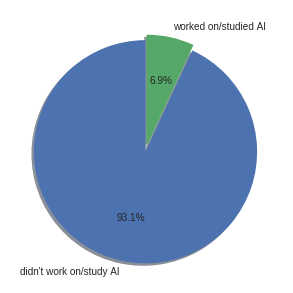

In [11]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['studied_ai'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
#plt.title("Questionnaire 4")
plt.show()

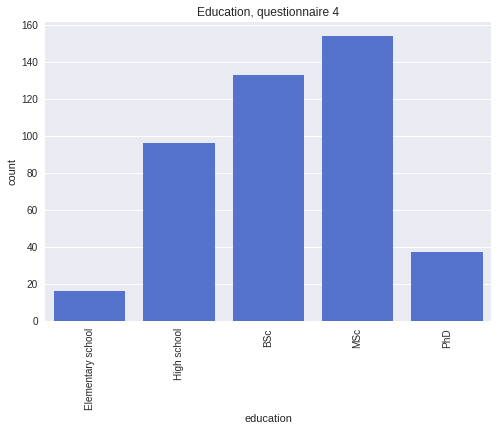

In [14]:
hist = sns.countplot(x = 'education',
                     data = df,
                     order = ["Elementary school", "High school", "BSc", "MSc", "PhD"],
                     color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Education, questionnaire 4")
plt.show()

In [17]:
df['education'].value_counts()/len(df)*100

MSc                  35.321101
BSc                  30.504587
High school          22.018349
PhD                   8.486239
Elementary school     3.669725
Name: education, dtype: float64

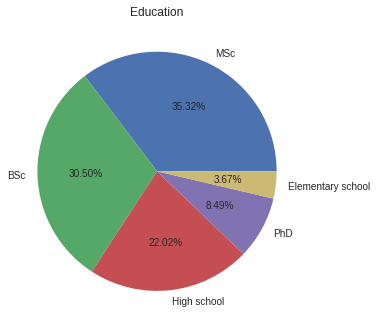

In [24]:
plt.pie(df['education'].value_counts()/len(df)*100, 
        labels=["MSc", "BSc", "High school", "PhD", "Elementary school"], 
        autopct='%1.2f%%')
plt.title("Education")
plt.show()

**1. Averaging over all images (people images), what percentage of right answers do the respondents have?**

In [44]:
cols = people_cols_mapped + ['questionnaire_id']

df1 = df[cols]
df1

,p1_map,p2_map,p3_map,p4_map,p5_map,p6_map,p7_map,p8_map,questionnaire_id
0,0,1,0,1,1,0,1,0,1
1,1,0,1,1,1,0,0,0,1
3,0,0,0,0,1,1,1,1,1
4,1,0,1,1,0,1,1,0,1
5,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
107,0,1,0,0,0,0,1,1,4
108,0,1,1,1,0,0,0,1,4
109,0,0,1,0,0,0,0,1,4
110,0,1,0,1,1,1,1,0,4


In [45]:
df1['correct_answer_percent'] = np.sum(df1[people_cols_mapped], axis=1)/8*100

In [46]:
df1

,p1_map,p2_map,p3_map,p4_map,p5_map,p6_map,p7_map,p8_map,questionnaire_id,correct_answer_percent
0,0,1,0,1,1,0,1,0,1,50.0
1,1,0,1,1,1,0,0,0,1,50.0
3,0,0,0,0,1,1,1,1,1,50.0
4,1,0,1,1,0,1,1,0,1,62.5
5,1,0,0,1,0,0,1,0,1,37.5
...,...,...,...,...,...,...,...,...,...,...
107,0,1,0,0,0,0,1,1,4,37.5
108,0,1,1,1,0,0,0,1,4,50.0
109,0,0,1,0,0,0,0,1,4,25.0
110,0,1,0,1,1,1,1,0,4,62.5


In [59]:
np.min(df1['correct_answer_percent'])

0.0

In [64]:
np.max(df1['correct_answer_percent'])

100.0

In [47]:
np.mean(df1['correct_answer_percent'])

56.680045871559635

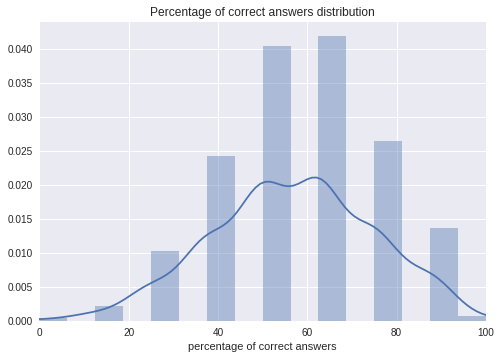

In [63]:
ax = sns.distplot(pd.Series(df1['correct_answer_percent'], name="percentage of correct answers"))
ax.set(xlim=(0,100))
plt.title('Percentage of correct answers distribution')
plt.show()